# STIX Python Tutorial
ISRO-ESA Heliophysics Workshop 19th-23rd January, 2026

## SolarOrbiter

* Deep space, encounter based mission
* Telemetry Limited - 800,000 photons per second (∼20 Mbits s−1) to a telemetry budget of 700 bits per second.

## STIX in 60 seconds


![STIX_IMG](https://pbs.twimg.com/media/DEn9pZLWsAAZxOb?format=jpg&name=large)

* 384 independent X-ray spectrometers
* Arranged in 32 sub-colimatorsm each contain a detector with 12 pixels

![STIX_DET_PLANE](https://user-images.githubusercontent.com/2226714/124253888-c417c900-db28-11eb-91a1-ad75d59dc662.png)

* 4 data processing chains
    * **House Keeping (HK)** - instantaneous measurements ever 64s
    * **Quick Look (QL)** - count data accumulated over 4s
        * Each detected event increments one of 12288 QL accumulators (32e x 32d x 12p)
    * **Science Data (SCI)** - count data obtain at variable native cadence
        * Each detected event increments one of 12288 SCI accumulators (32e x 32d x 12p)
        * Each event also increments one of 16 trigger accumulators
        * Integration continues in units of 0.1s until:
            * minimum integration time has been exceeded AND count threshold (within a specified energy range) has also been exceeded
            * maximum integration time is reached
        * Once integration in complete the FPGA transfer the accumulators to a time tagged rotating buffer
        * The flight software then removes accumulators with zero counts and stores in the “archive buffer”  as a new file (16GB flash)
    * Energy Calibration (CAL) - count data obtained in "quite" times
        * Each detection increments one of 393216 accumulators (1024e x 32d x 12p)

## stixpy 

###    repo: https://github.com/samaloney/stixpy
###    docs: https://stixpy.readthedocs.io/en/latest/

**To install the necessary packages uncomment and run the following (kernel may need to be restarted)**

In [ ]:
#%pip install stixpy sunpy==6.1.2

## Quick Look
### Search & Download

In [3]:
# bad idea just to keep output clean
import warnings
warnings.filterwarnings('ignore')

from sunpy.net import Fido, attrs as a
from stixpy.net import client # Registers stixpy with Fido

ql_query = Fido.search(a.Time('2021-12-15T10:30', '2021-12-15T11:01:00'), a.Instrument.stix)

In [4]:
ql_query

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
object,object,str4,str3,str3,str20,str3,str21
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-lightcurve,V02,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-background,V02,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-variance,V02,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-spectra,V02,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-flareflag,V02,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-tmstatusflarelist,V02,-
2021-12-15 10:02:59.000,2021-12-15 10:31:35.000,STIX,L1,SCI,sci-xray-cpd,V02,2112150044
2021-12-15 10:30:27.000,2021-12-15 11:32:08.000,STIX,L1,SCI,sci-xray-cpd,V02,2112150051
2021-12-15 10:35:15.000,2021-12-15 10:48:12.000,STIX,L1,SCI,sci-xray-cpd,V02,2112150049


Could filter the results for specific data

In [5]:
ql_mask = ql_query['stix']['DataType'] == 'QL'
ql_query['stix'][ql_mask]

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
object,object,str4,str3,str3,str20,str3,str21
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-lightcurve,V02,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-background,V02,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-variance,V02,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-spectra,V02,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-flareflag,V02,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-tmstatusflarelist,V02,-


But stixpy adds a number of STIX specific attrs:
 * `a.stix.DataType` - a type of data e.g. ql, cal, sci, hk
 * `a.stix.DataProduct` - a specific product e.g. ql-background
 * `a.stix.Version`, `a.stix.VersionMax`, ... - specific versions

so the same results can be achieved using the `a.stix.DataType` attr

In [6]:
ql_query = Fido.search(a.Time('2021-12-15T10:30', '2021-12-15T11:01:00'), 
                       a.Instrument.stix, a.stix.DataType.ql)
ql_query


Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
Time,Time,str4,str2,str2,str20,str3,str1
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-lightcurve,V02,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-background,V02,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-variance,V02,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-spectra,V02,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-flareflag,V02,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-tmstatusflarelist,V02,-


In [7]:
# a.stix.DataType.
# a.stix.DataProduct.
# a.stix.

Now lets download some QL data

In [8]:
ql_files = Fido.fetch(ql_query)
ql_files

Files Downloaded:   0%|          | 0/6 [00:00<?, ?file/s]

['/Users/sm/sunpy/data/solo_L1_stix-ql-lightcurve_20211215_V02.fits', '/Users/sm/sunpy/data/solo_L1_stix-ql-background_20211215_V02.fits', '/Users/sm/sunpy/data/solo_L1_stix-ql-variance_20211215_V02.fits', '/Users/sm/sunpy/data/solo_L1_stix-ql-spectra_20211215_V02.fits', '/Users/sm/sunpy/data/solo_L1_stix-ql-flareflag_20211215_V02.fits', '/Users/sm/sunpy/data/solo_L1_stix-ql-tmstatusflarelist_20211215_V02.fits']

In [9]:
[q.split('/')[-1] for q in ql_files]

['solo_L1_stix-ql-lightcurve_20211215_V02.fits',
 'solo_L1_stix-ql-background_20211215_V02.fits',
 'solo_L1_stix-ql-variance_20211215_V02.fits',
 'solo_L1_stix-ql-spectra_20211215_V02.fits',
 'solo_L1_stix-ql-flareflag_20211215_V02.fits',
 'solo_L1_stix-ql-tmstatusflarelist_20211215_V02.fits']

**!!! Note the order of the returned files can change !!!**

See this issue on sunpy https://github.com/sunpy/sunpy/issues/5517

Once we have the data we can load and plot

In [10]:
from sunpy.timeseries import TimeSeries
from stixpy import timeseries # Registers stixpy TimeSeries with sunpy TimeSeries

ql_lc = TimeSeries(ql_files[0])

Small textual representation of the data

QLLightCurve
       <sunpy.time.timerange.TimeRange object at 0x12ac44950>
    Start: 2021-12-15 00:00:02
    End:   2021-12-15 23:59:58
    Center:2021-12-15 12:00:00
    Duration:0.9999537037037036 days or
           23.998888888888885 hours or
           1439.9333333333332 minutes or
           86396.0 seconds
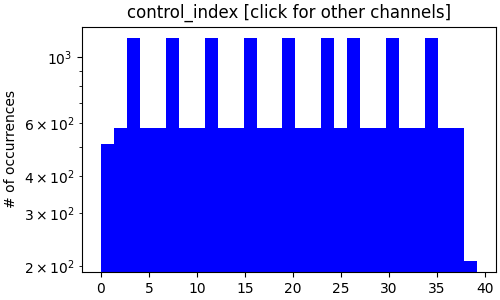
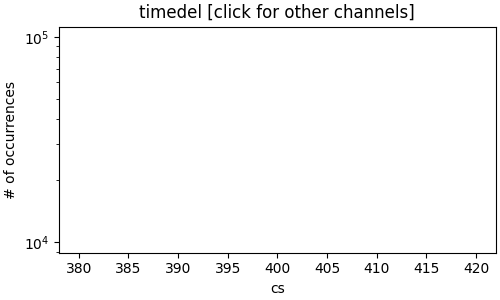
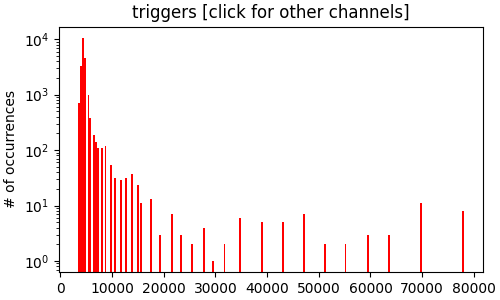
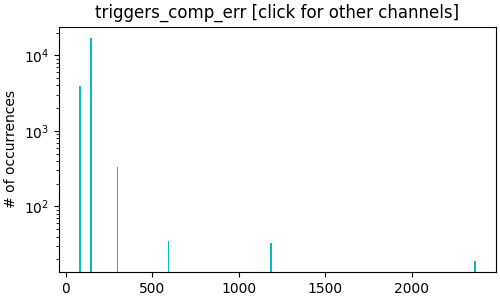
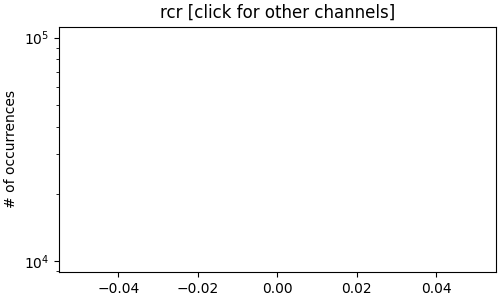
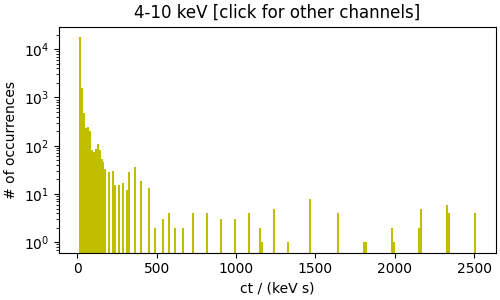
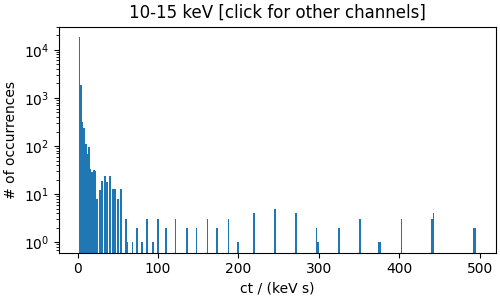
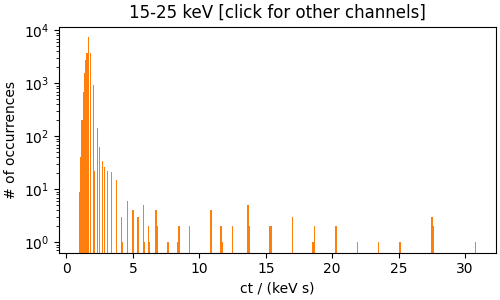
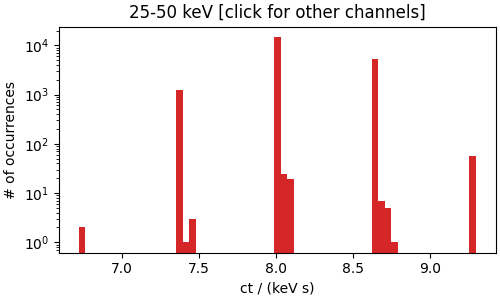
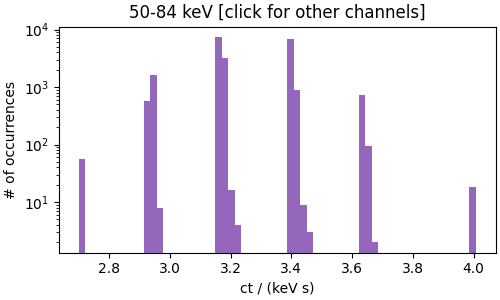
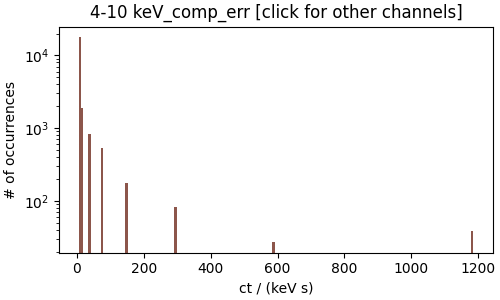
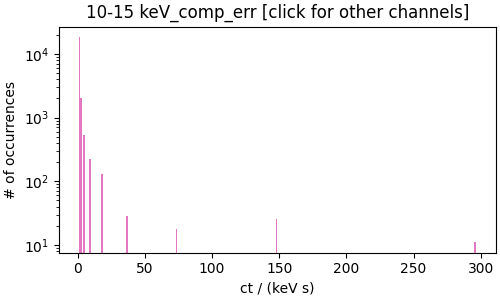
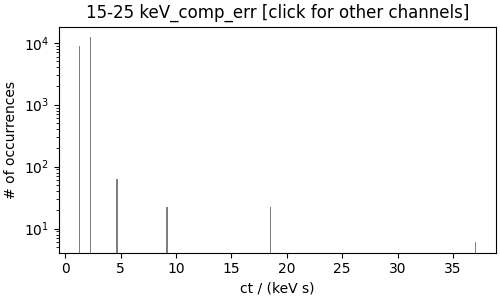
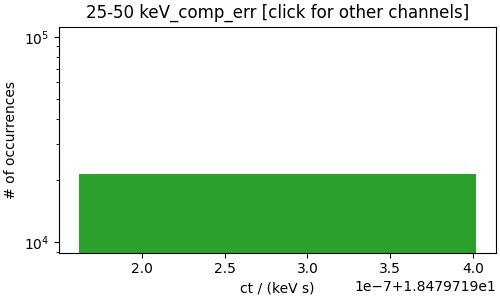
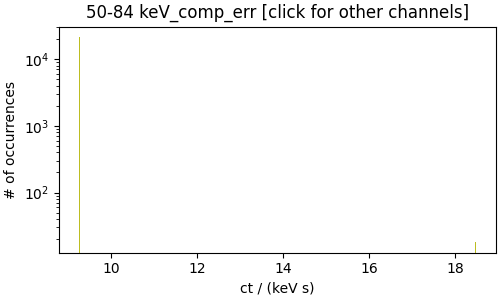
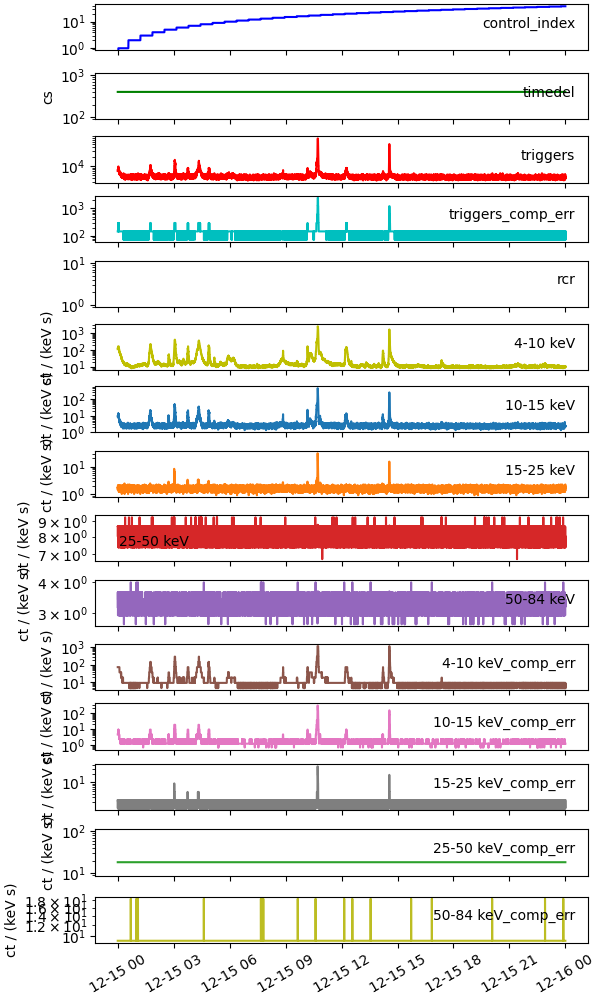
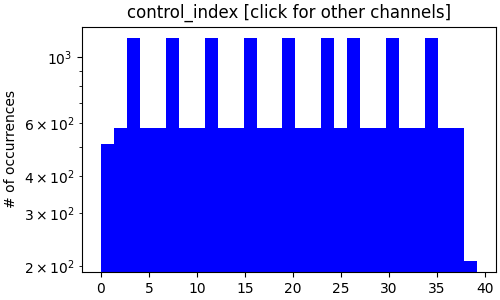

In [11]:
ql_lc

### Plotting

We can plot the data using the `plot()` method

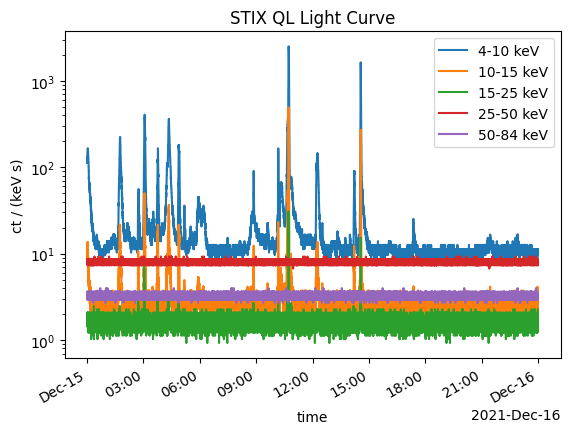

In [12]:
ql_lc.plot();

Just like a normal plot we can interact with it as usual

(np.float64(18976.375), np.float64(18976.5))

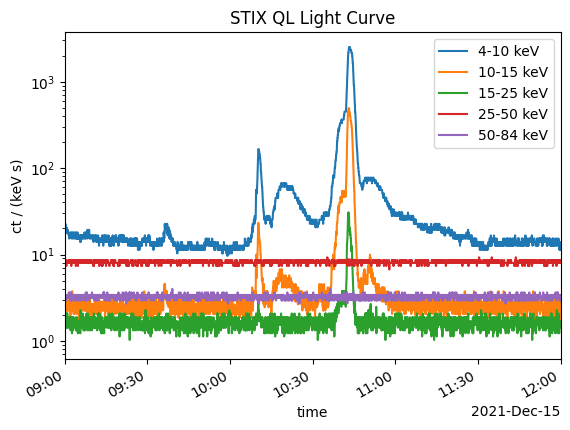

In [13]:
from datetime import datetime
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

ql_lc.plot(axes=ax);
ax.set_xlim([datetime(2021, 12, 15, 9), datetime(2021, 12, 15, 12)])
# ax.set_yscale('linear')

## Science Data
Types or level (lower case l):
* Raw Pixel Data (RPD) or l0 - most raw form uncompressedarchive buffer
* Compressed Pixel Data (CPD) or l1 - compressed and optionally summed over time or energy ✅
* Summed Compressed Pixel Data (SCPD) or l2 - summed over pixels and optionally summed over time or energy
* Visibility or l3 - pixels converted to visibilities on board and optionally summed over time or energy
* Spectrogram or l4 - all pixel and detectors summed into spectrogram and and optionally summed over time or energy ✅
* Burst Aspect - high cadence aspect data

## Spectrograms
### Search & Download
Let use the `a.stix.DataProduct` attr to only search for Spectrogram data

In [14]:
spec_query = Fido.search(a.Time('2021-12-15T09:00', '2021-12-15T12:00:00'), 
                         a.Instrument.stix, a.stix.DataProduct.sci_xray_spec)
spec_query

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str13,str3,int64
2021-12-15 07:18:31.000,2021-12-15 10:00:59.000,STIX,L1,SCI,sci-xray-spec,V02,2112150006
2021-12-15 07:18:31.000,2021-12-15 10:00:59.000,STIX,L1,SCI,sci-xray-spec,V02,2112156715
2021-12-15 07:18:31.000,2021-12-15 10:00:59.000,STIX,L1,SCI,sci-xray-spec,V04,2112150006
2021-12-15 07:18:31.000,2021-12-15 10:00:59.000,STIX,L1,SCI,sci-xray-spec,V04,2112156715
2021-12-15 09:57:01.000,2021-12-15 10:32:09.000,STIX,L1,SCI,sci-xray-spec,V02,2112150007
2021-12-15 09:57:01.000,2021-12-15 10:32:09.000,STIX,L1,SCI,sci-xray-spec,V02,2112155435
2021-12-15 09:57:01.000,2021-12-15 10:32:09.000,STIX,L1,SCI,sci-xray-spec,V04,2112150007
2021-12-15 09:57:01.000,2021-12-15 10:32:09.000,STIX,L1,SCI,sci-xray-spec,V04,2112155435
2021-12-15 10:29:12.000,2021-12-15 12:09:42.000,STIX,L1,SCI,sci-xray-spec,V02,2112150008


Lets narrow the time range even more and only keep latest versions

In [26]:
spec_query = Fido.search(a.Time('2021-12-15T10:30', '2021-12-15T11:01:00'), 
                         a.Instrument.stix, a.stix.DataProduct.sci_xray_spec)
spec_query

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str13,str3,int64
2021-12-15 09:57:01.000,2021-12-15 10:32:09.000,STIX,L1,SCI,sci-xray-spec,V02,2112150007
2021-12-15 09:57:01.000,2021-12-15 10:32:09.000,STIX,L1,SCI,sci-xray-spec,V02,2112155435
2021-12-15 09:57:01.000,2021-12-15 10:32:09.000,STIX,L1,SCI,sci-xray-spec,V04,2112150007
2021-12-15 09:57:01.000,2021-12-15 10:32:09.000,STIX,L1,SCI,sci-xray-spec,V04,2112155435
2021-12-15 10:29:12.000,2021-12-15 12:09:42.000,STIX,L1,SCI,sci-xray-spec,V02,2112150008
2021-12-15 10:29:12.000,2021-12-15 12:09:42.000,STIX,L1,SCI,sci-xray-spec,V02,2112153435
2021-12-15 10:29:12.000,2021-12-15 12:09:42.000,STIX,L1,SCI,sci-xray-spec,V04,2112150008
2021-12-15 10:29:12.000,2021-12-15 12:09:42.000,STIX,L1,SCI,sci-xray-spec,V04,2112153435
2021-12-15 10:31:13.000,2021-12-15 11:00:44.000,STIX,L1,SCI,sci-xray-spec,V02,2112150016


In [27]:
idx = [i for i, row in enumerate(spec_query['stix']) 
       if row['Request ID'] in (2112150016, 2112156884)]
idx

[8, 9, 10, 11]

Lets downloads the data as before and print the file names so we can load the files we want

In [28]:
spec_files = Fido.fetch(spec_query['stix'][idx])
[s.split('/')[-1] for s in spec_files]
spec_files

Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

['/Users/sm/sunpy/data/solo_L1_stix-sci-xray-spec_20211215T103113-20211215T110044_V02_2112150016-54143.fits', '/Users/sm/sunpy/data/solo_L1_stix-sci-xray-spec_20211215T103113-20211215T110044_V02_2112156884-60145.fits', '/Users/sm/sunpy/data/solo_L1_stix-sci-xray-spec_20211215T103113-20211215T110044_V04_2112150016-54143.fits', '/Users/sm/sunpy/data/solo_L1_stix-sci-xray-spec_20211215T103113-20211215T110044_V04_2112156884-60145.fits']

In [29]:
from stixpy.product import Product
spec0 = Product(spec_files[2])
spec1 = Product(spec_files[3])

spec0, spec1

(Spectrogram   <sunpy.time.timerange.TimeRange object at 0x138270590>
     Start: 2021-12-15 10:31:13
     End:   2021-12-15 11:00:44
     Center:2021-12-15 10:45:59
     Duration:0.020489583333333283 days or
            0.4917499999999988 hours or
            29.504999999999928 minutes or
            1770.2999999999956 seconds
     DetectorMasks
     [0]: [0,1,2,3,4,5,6,7,_,_,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
 
     PixelMasks
     [0...953]: [['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]
 
     EnergyEdgeMasks
     [0]: [_,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,_,_,_,_,_,_,_,_,_,_,_,_,_,_],
 Spectrogram   <sunpy.time.timerange.TimeRange object at 0x1382e50d0>
     Start: 2021-12-15 10:31:13
     End:   2021-12-15 11:00:44
     Center:2021-12-15 10:45:59
     Duration:0.020489583333333283 days or
            0.4917499999999988 hours or
            29.504999999999928 minutes or
            1770.2999999999956 seconds
     DetectorMasks
     [0

These object have a number of convenience methods and properties to facilitate data analysis

In [30]:
# spec0.header, spec0.dE

### Plotting

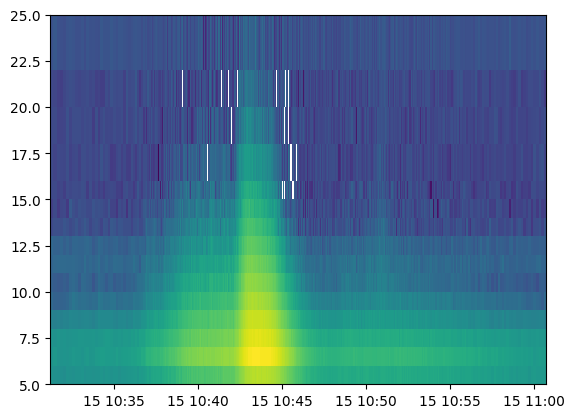

In [31]:
spec0.plot_spectrogram();

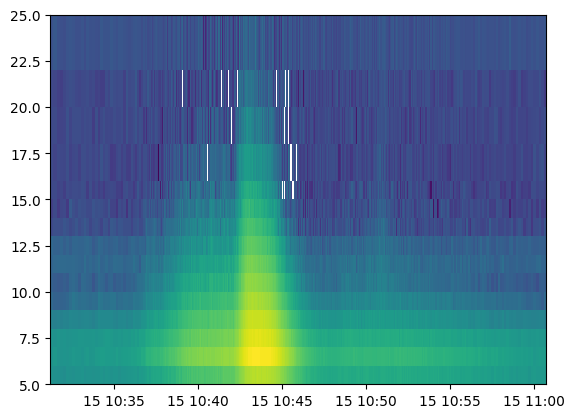

In [32]:
spec1.plot_spectrogram();

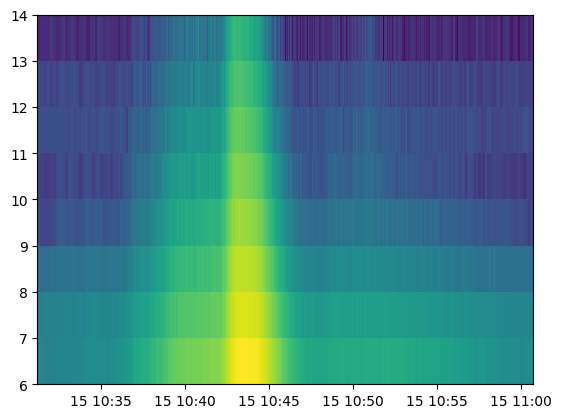

In [33]:
spec1.plot_spectrogram(energy_indices=list(range(1, 11)))

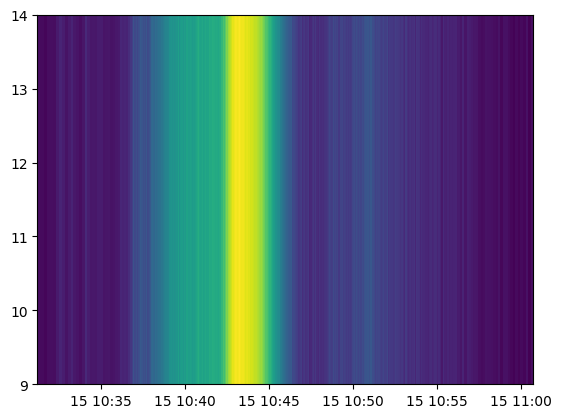

In [34]:
spec1.plot_spectrogram(energy_indices=[[1, 5,],[5, 10],[10,16]])

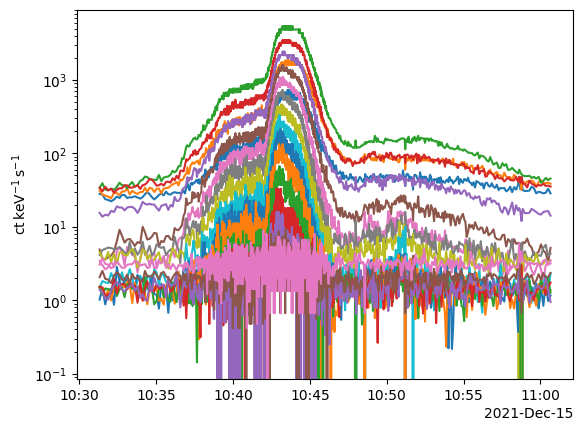

In [35]:
spec0.plot_timeseries();

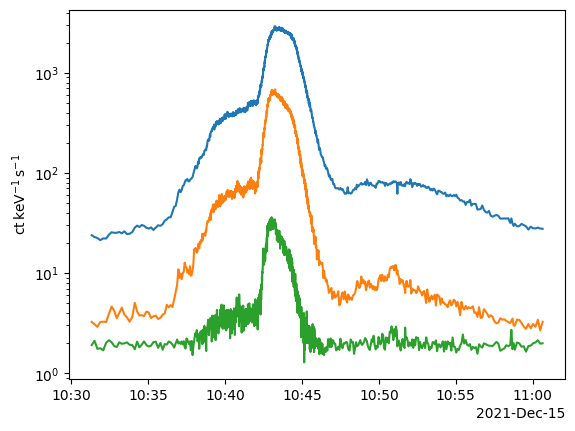

In [36]:
spec0.plot_timeseries(energy_indices=[[1, 5,],[5, 10],[10,16]])

In [37]:
spec0.times.shape

(954,)

Let's sum every 5 time bins to get better signal to noise

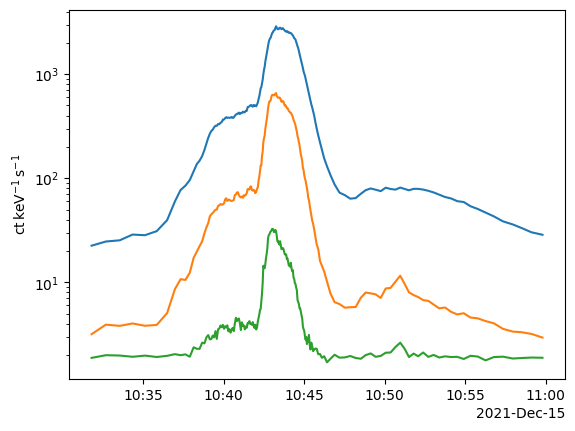

In [38]:
spec0.plot_timeseries(time_indices=[(i*5, (i+1)*5) for i in range(190)],
                      energy_indices=[[1, 5,],[5, 10],[10,16]])

This may not work as you expect due to the variable cadence if we plot the bin centers we can see this, if it was uniform time bin this would show a straight line.

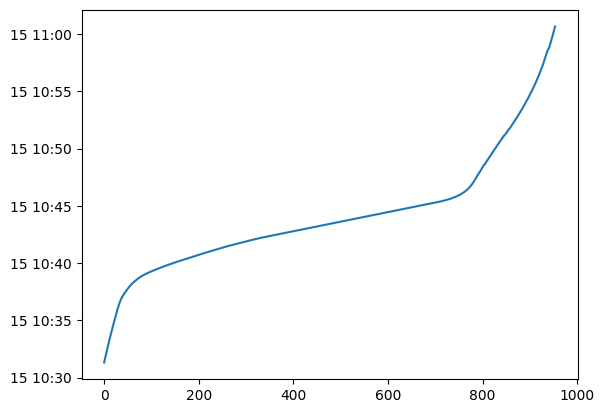

In [39]:
plt.plot(spec0.times.datetime)

It's probably a bit more clear if we plot the center of the time bin vs the size or integration time.

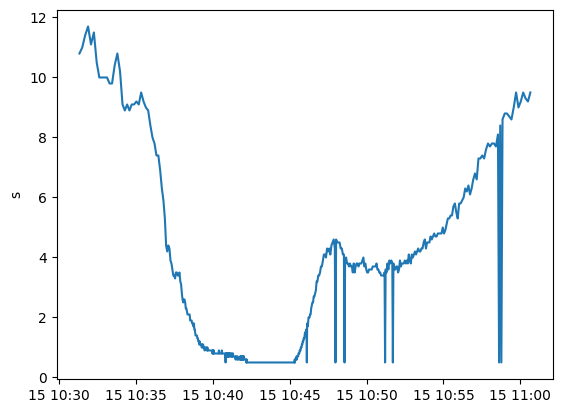

In [40]:
plt.plot(spec0.times.datetime, spec0.data['timedel'].to('s'))

## Compressed Pixel Data 
### Search & Download

Same procedure as before except we will use the `a.stix.DataProduct.sci_xray_cpd` attr to search for `CompressedPixelData`

In [41]:
cpd_query = Fido.search(a.Time('2021-12-15T10:30', '2021-12-15T11:01:00'), 
                         a.Instrument.stix, a.stix.DataProduct.sci_xray_cpd)
cpd_query['stix']

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2021-12-15 10:02:59.000,2021-12-15 10:31:35.000,STIX,L1,SCI,sci-xray-cpd,V02,2112150044
2021-12-15 10:30:27.000,2021-12-15 11:32:08.000,STIX,L1,SCI,sci-xray-cpd,V02,2112150051
2021-12-15 10:35:15.000,2021-12-15 10:48:12.000,STIX,L1,SCI,sci-xray-cpd,V02,2112150049
2021-12-15 10:35:34.000,2021-12-15 10:47:15.000,STIX,L1,SCI,sci-xray-cpd,V02,2112150054
2021-12-15 10:41:12.000,2021-12-15 10:47:15.000,STIX,L1,SCI,sci-xray-cpd,V02,2112150057


In [42]:
cpd_query['stix'][2:-1]

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2021-12-15 10:35:15.000,2021-12-15 10:48:12.000,STIX,L1,SCI,sci-xray-cpd,V02,2112150049
2021-12-15 10:35:34.000,2021-12-15 10:47:15.000,STIX,L1,SCI,sci-xray-cpd,V02,2112150054


In [43]:
cpd_files = Fido.fetch(cpd_query['stix'][2:-1])
[c.split('/')[-1] for c in cpd_files]

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

['solo_L1_stix-sci-xray-cpd_20211215T103515-20211215T104812_V02_2112150049-54909.fits',
 'solo_L1_stix-sci-xray-cpd_20211215T103534-20211215T104715_V02_2112150054-54922.fits']

Now lets load these files into `sitxpy`

In [44]:
cpd0 = Product(cpd_files[0])
cpd1 = Product(cpd_files[1])

cpd0, cpd1

(CompressedPixelData   <sunpy.time.timerange.TimeRange object at 0x12e55be90>
     Start: 2021-12-15 10:35:15
     End:   2021-12-15 10:48:12
     Center:2021-12-15 10:41:43
     Duration:0.008994212962962989 days or
            0.21586111111111173 hours or
            12.951666666666704 minutes or
            777.1000000000022 seconds
     DetectorMasks
     [0...773]: [_,_,_,_,_,_,_,_,_,9,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_]
 
     PixelMasks
     [0...773]: [['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]
 
     EnergyEdgeMasks
     [0]: [_,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,_,_,_,_],
 CompressedPixelData   <sunpy.time.timerange.TimeRange object at 0x12e55bf90>
     Start: 2021-12-15 10:35:34
     End:   2021-12-15 10:47:15
     Center:2021-12-15 10:41:24
     Duration:0.008119212962962974 days or
            0.19486111111111137 hours or
            11.691666666666682 minutes or
            701.5000000000009 seconds
     DetectorMas

In [45]:
cpd1.control['request_id'], cpd0.control['request_id']

(<Column name='request_id' dtype='uint32' length=1>
 2112150054,
 <Column name='request_id' dtype='uint32' length=1>
 2112150049)

In this case we can see the two requests are in fact quite different:
   * Req 2112150049 contains only one detector, more energies, and more times while
   * Req 2112150054 contains all detectors, fewer energies and fewer times
 

In [46]:
[(c.data['timedel'].to('s').min(), c.data['timedel'].to('s').max()) for c in [cpd0, cpd1]]

[(<Quantity 0.5 s>, <Quantity 9.5 s>), (<Quantity 0.9 s>, <Quantity 9. s>)]

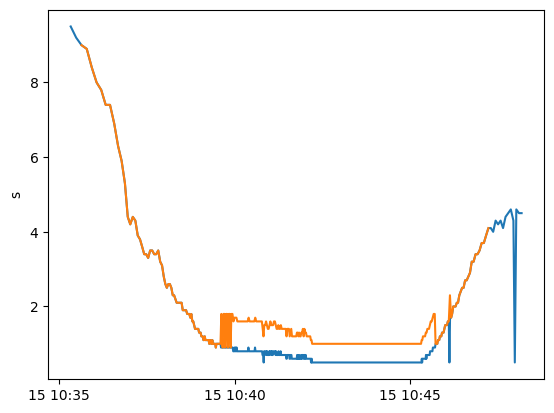

In [47]:
plt.plot(cpd0.data['time'].datetime, cpd0.data['timedel'].to('s'))
plt.plot(cpd1.data['time'].datetime, cpd1.data['timedel'].to('s'))

### Plotting
Let's have a look at the spectrogram plots

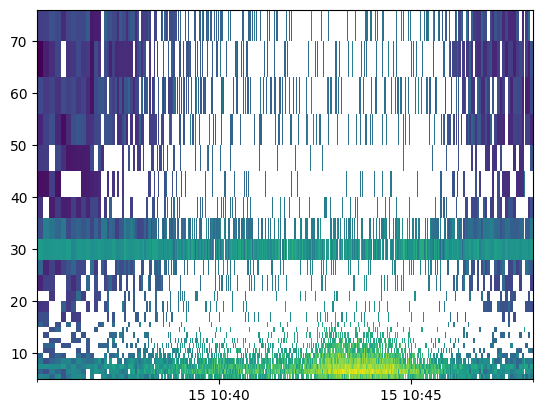

In [48]:
cpd0.plot_spectrogram()

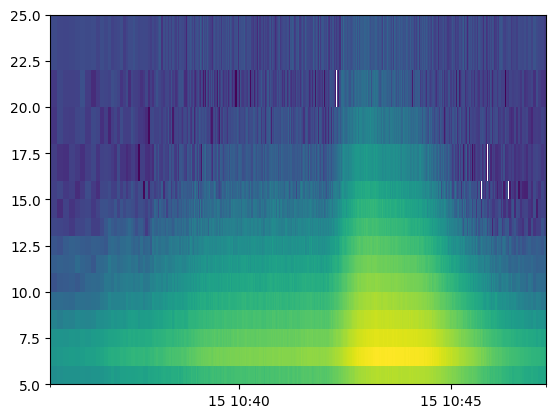

In [49]:
cpd1.plot_spectrogram()

The `cpd0` spectrogram is noisier due to the fact it only contains one detector.
`CompressedPixelData` support the same methods as `Spectrogram` so we can plot lightcurves of timeseries and spectrogram but it additionally has `plot_pixels()` methods.

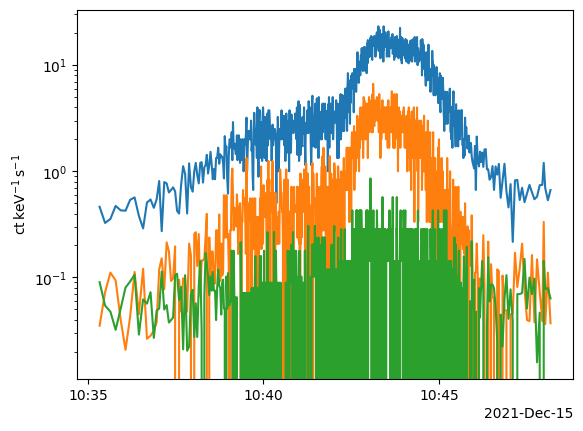

In [50]:
cpd0.plot_timeseries(energy_indices=[[1, 5,],[5, 10],[10,16]])

cpd0.plot_pixels()

## Imaging

Load flare and background CPD files

In [67]:
import astropy.units as u
import numpy as np

from astropy.coordinates import SkyCoord
from sunpy.coordinates import HeliographicStonyhurst, Helioprojective
from sunpy.map import Map, make_fitswcs_header
from sunpy.time import TimeRange
from xrayvision.clean import vis_clean
from xrayvision.imaging import vis_to_image, vis_to_map
from xrayvision.mem import mem, resistant_mean

from stixpy.calibration.visibility import calibrate_visibility, create_meta_pixels, create_visibility
from stixpy.coordinates.frames import STIXImaging
from stixpy.coordinates.transforms import get_hpc_info
from stixpy.imaging.em import em
from stixpy.map.stix import STIXMap  # noqa
from stixpy.product import Product

# Really bad idea just to keep outputs clean
import logging
loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
for logger in loggers:
    logger.setLevel(logging.CRITICAL)

In [53]:
cpd_sci = Product(
    "http://pub099.cs.technik.fhnw.ch/fits/L1/2021/09/23/SCI/solo_L1_stix-sci-xray-cpd_20210923T152015-20210923T152639_V02_2109230030-62447.fits"
)

cpd_bkg = Product(
    "http://pub099.cs.technik.fhnw.ch/fits/L1/2021/09/23/SCI/solo_L1_stix-sci-xray-cpd_20210923T095923-20210923T113523_V02_2109230083-57078.fits"
)



Set time and energy ranges which will be considered for the science and the background file

In [54]:
time_range_sci = ["2021-09-23T15:20:00", "2021-09-23T15:23:00"]
time_range_bkg = [
    "2021-09-23T09:00:00",
    "2021-09-23T12:00:00",
]  # Set this range larger than the actual observation time
energy_range = [25, 28] * u.keV

Create the meta pixel, A, B, C, D for the science and the background data

In [55]:
meta_pixels_sci = create_meta_pixels(
    cpd_sci, time_range=time_range_sci, energy_range=energy_range, flare_location=[0, 0] * u.arcsec, no_shadowing=True
)

meta_pixels_bkg = create_meta_pixels(
    cpd_bkg, time_range=time_range_bkg, energy_range=energy_range, flare_location=[0, 0] * u.arcsec, no_shadowing=True
)

Perform background subtraction

In [56]:
meta_pixels_bkg_subtracted = {
    **meta_pixels_sci,
    "abcd_rate_kev_cm": meta_pixels_sci["abcd_rate_kev_cm"] - meta_pixels_bkg["abcd_rate_kev_cm"],
    "abcd_rate_error_kev_cm": np.sqrt(
        meta_pixels_sci["abcd_rate_error_kev_cm"] ** 2 + meta_pixels_bkg["abcd_rate_error_kev_cm"] ** 2
    ),
}

Create visibilities from the meta pixels

In [57]:
vis = create_visibility(meta_pixels_bkg_subtracted)

Obtain the necessary ephemeris data create HPC 0,0 coordinate

In [68]:
vis_tr = TimeRange(vis.meta["time_range"])
roll, solo_xyz, pointing = get_hpc_info(vis_tr.start, vis_tr.end)
solo = HeliographicStonyhurst(*solo_xyz, obstime=vis_tr.center, representation_type="cartesian")
center_hpc = SkyCoord(0 * u.deg, 0 * u.deg, frame=Helioprojective(obstime=vis_tr.center, observer=solo))


Calibrate the visibilities

If position not given will default to sun center flare location

In [69]:
cal_vis = calibrate_visibility(vis, flare_location=center_hpc)

Selected detectors 10 to 7 and slice visibilities

In [60]:
# order by sub-collimator e.g. 10a, 10b, 10c, 9a, 9b, 9c ....
isc_10_7 = [3, 20, 22, 16, 14, 32, 21, 26, 4, 24, 8, 28]
idx = np.argwhere(np.isin(cal_vis.meta["isc"], isc_10_7)).ravel()

vis10_7 = cal_vis[idx]

Set up image parameters

In [61]:
imsize = [512, 512] * u.pixel  # number of pixels of the map to reconstruct
pixel = [10, 10] * u.arcsec / u.pixel  # pixel size in arcsec

Make a full disk backprojection

In [62]:
bp_image = vis_to_image(vis10_7, imsize, pixel_size=pixel)

Obtain the necessary ephemeris data to create a map in STIX frame

In [70]:
vis_tr = TimeRange(vis.meta["time_range"])
roll, solo_xyz, pointing = get_hpc_info(vis_tr.start, vis_tr.end)
solo = HeliographicStonyhurst(*solo_xyz, obstime=vis_tr.center, representation_type="cartesian")
coord_stix = center_hpc.transform_to(STIXImaging(obstime=vis_tr.start, obstime_end=vis_tr.end, observer=solo))
header = make_fitswcs_header(
    bp_image, coord_stix, telescope="STIX", observatory="Solar Orbiter", scale=[10, 10] * u.arcsec / u.pix
)
fd_bp_map = Map((bp_image, header))

Convert the coordinates and make a map in Helioprojective with "North" rotated "up"

In [71]:
header_hp = make_fitswcs_header(
    bp_image, center_hpc, scale=[10, 10] * u.arcsec / u.pix, rotation_angle=90 * u.deg + roll
)
hp_map = Map((bp_image, header_hp))
hp_map_rotated = hp_map.rotate()

Estimate the flare location and plot on top of back projection map. 

In [72]:
max_pixel = np.argwhere(fd_bp_map.data == fd_bp_map.data.max()).ravel() * u.pixel
# because WCS axes and array are reversed
max_stix = fd_bp_map.pixel_to_world(max_pixel[1], max_pixel[0])

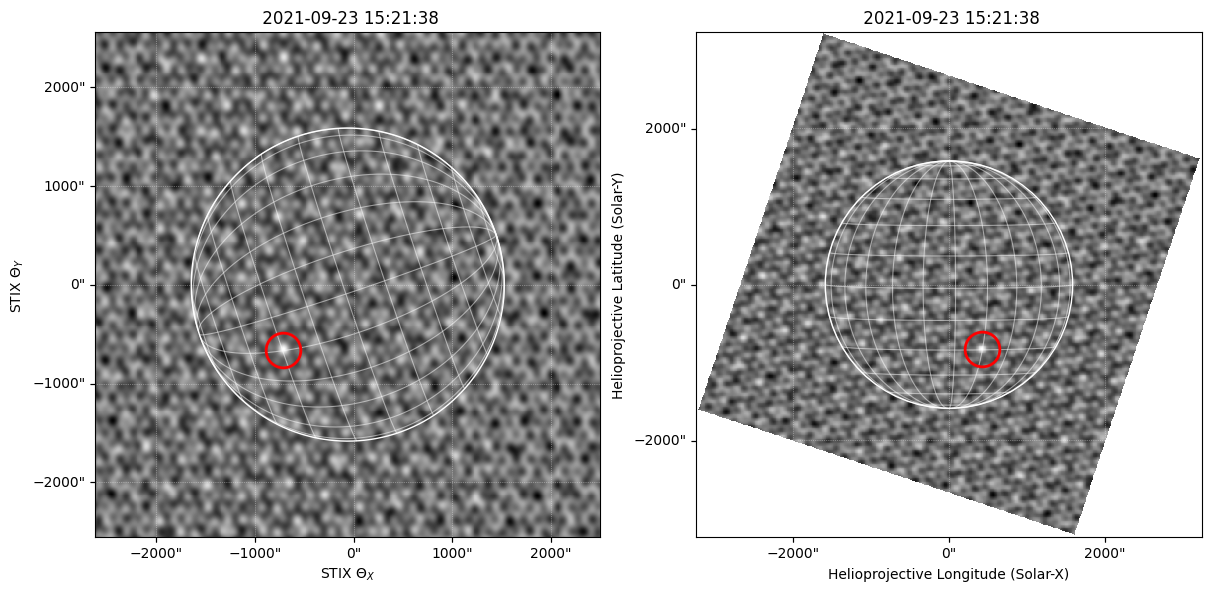

In [73]:
fig = plt.figure(layout="constrained", figsize=(12, 6))
ax = fig.subplot_mosaic(
    [["stix", "hpc"]], per_subplot_kw={"stix": {"projection": fd_bp_map}, "hpc": {"projection": hp_map_rotated}}
)
fd_bp_map.plot(axes=ax["stix"])
fd_bp_map.draw_limb()
fd_bp_map.draw_grid()

hp_map_rotated.plot(axes=ax["hpc"])
hp_map_rotated.draw_limb()
hp_map_rotated.draw_grid()

ax["stix"].plot_coord(max_stix, marker=".", markersize=50, fillstyle="none", color="r", markeredgewidth=2)
ax["hpc"].plot_coord(max_stix, marker=".", markersize=50, fillstyle="none", color="r", markeredgewidth=2)


Use estimated flare location to create more accurate visibilities

In [74]:
meta_pixels_sci = create_meta_pixels(
    cpd_sci, time_range=time_range_sci, energy_range=energy_range, flare_location=max_stix, no_shadowing=True
)

meta_pixels_bkg_subtracted = {
    **meta_pixels_sci,
    "abcd_rate_kev_cm": meta_pixels_sci["abcd_rate_kev_cm"] - meta_pixels_bkg["abcd_rate_kev_cm"],
    "abcd_rate_error_kev_cm": np.sqrt(
        meta_pixels_sci["abcd_rate_error_kev_cm"] ** 2 + meta_pixels_bkg["abcd_rate_error_kev_cm"] ** 2
    ),
}

vis = create_visibility(meta_pixels_bkg_subtracted)
cal_vis = calibrate_visibility(vis, flare_location=max_stix)

# Selected detectors 10 to 3
# order by sub-collimator e.g. 10a, 10b, 10c, 9a, 9b, 9c ....
isc_10_3 = [3, 20, 22, 16, 14, 32, 21, 26, 4, 24, 8, 28, 15, 27, 31, 6, 30, 2, 25, 5, 23, 7, 29, 1]
idx = np.argwhere(np.isin(cal_vis.meta["isc"], isc_10_3)).ravel()


Create an ``xrayvsion`` visibility object

In [75]:
cal_vis.meta["offset"] = max_stix
vis10_3 = cal_vis[idx]

Set up image parameters

In [76]:
imsize = [129, 129] * u.pixel  # number of pixels of the map to reconstruct
pixel = [2, 2] * u.arcsec / u.pixel  # pixel size in arcsec

Create an image backprojection with uniform weighting

In [77]:
bp_nat = vis_to_image(vis10_3, imsize, pixel_size=pixel)

Create an image using "clean" in Helioprojective

In [78]:
niter = 200  # number of iterations
gain = 0.1  # gain used in each clean iteration
beam_width = 20.0 * u.arcsec
clean_map, model_map, resid_map = vis_clean(
    vis10_3, imsize, pixel_size=pixel, gain=gain, niter=niter, clean_beam_width=20 * u.arcsec
)

Create an image using the MEM GE algorithm `mem`

In [79]:
snr_value, _ = resistant_mean((np.abs(vis10_3.visibilities) / vis10_3.amplitude_uncertainty).flatten(), 3)
percent_lambda = 2 / (snr_value**2 + 90)
mem_map = mem(vis10_3, shape=imsize, pixel_size=pixel, percent_lambda=percent_lambda)

Create an image using the EM algorithm `EM`

In [80]:
em_map = em(
    meta_pixels_bkg_subtracted["abcd_rate_kev_cm"], cal_vis,
    shape=imsize, pixel_size=pixel, flare_location=max_stix,
    idx=idx,
)

Create maps from images

In [81]:
header = make_fitswcs_header(
    clean_map.data,
    max_stix.transform_to(Helioprojective(obstime=vis_tr.center, observer=solo)),
    telescope="STIX",
    observatory="Solar Orbiter",
    scale=pixel,
    rotation_angle=90 * u.deg + roll,
)

clean_map = Map((clean_map.data, header)).rotate()
bp_map = Map((bp_nat, header)).rotate()
mem_map = Map((mem_map.data, header)).rotate()
em_map = Map((em_map, header)).rotate()

Finally compare the various results

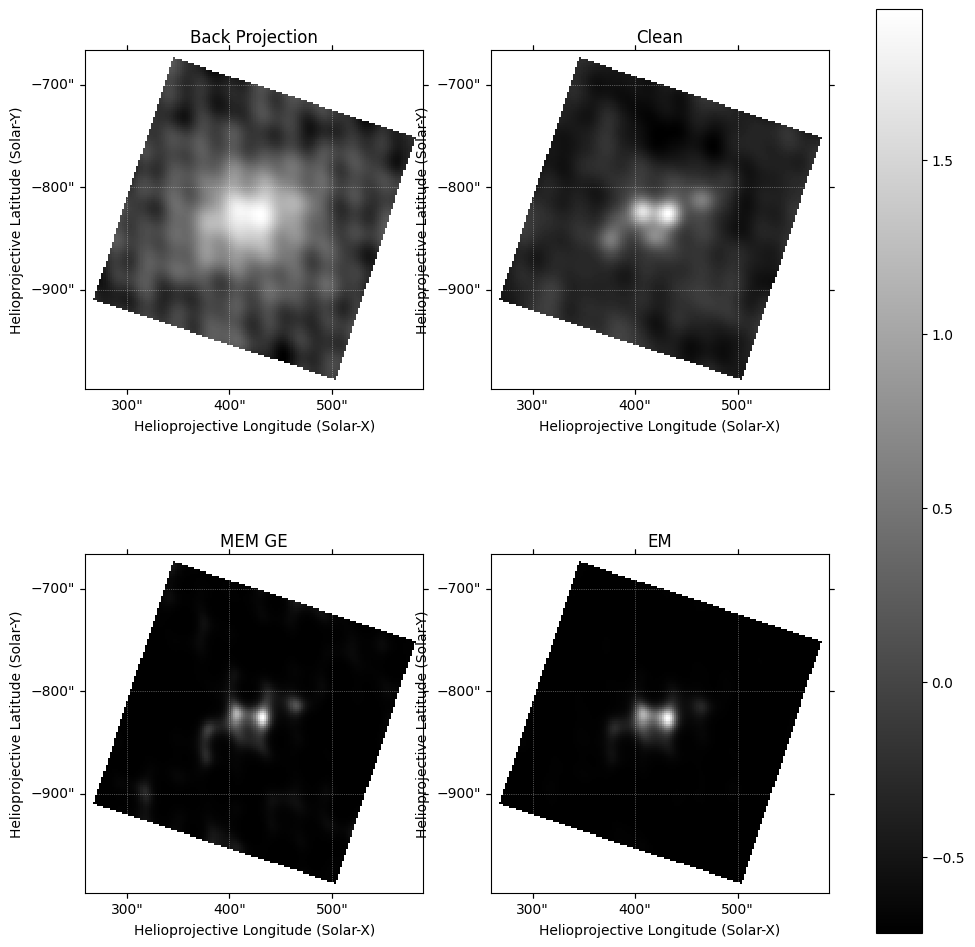

In [82]:
vmax = max([clean_map.data.max(), mem_map.data.max(), em_map.data.max()])
fig = plt.figure(figsize=(12, 12))
ax = fig.subplot_mosaic(
    [
        ["bp", "clean"],
        ["mem", "em"],
    ],
    subplot_kw={"projection": clean_map},
)
a = bp_map.plot(axes=ax["bp"])
ax["bp"].set_title("Back Projection")
b = clean_map.plot(axes=ax["clean"])
ax["clean"].set_title("Clean")
c = mem_map.plot(axes=ax["mem"])
ax["mem"].set_title("MEM GE")
d = em_map.plot(axes=ax["em"])
ax["em"].set_title("EM")
fig.colorbar(a, ax=ax.values())
plt.show()


## Spectroscopy

* Still under developement but very close planned initial support with stixpy 0.3 in Q1 2026
* sunkit-spex 